# Distance measurement using corners with opencv in python

In [1]:
#imports
from os import path
from scipy.spatial import distance as dist
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
curdir = path.abspath("")

---
to prove this algorithm will use a simple chess board image. below is a list of step involved in this algorithm  
1. convert the image into gray scale for simplicity
2. blur the images to reduce the noise in the image
3. apply canny edge detection and convert the image into series of lines
4. apply dilate to join any disjointed adjacent edges.
5. find the corners point and store them to a list.
6. using these values we can calculate the distances in the image.

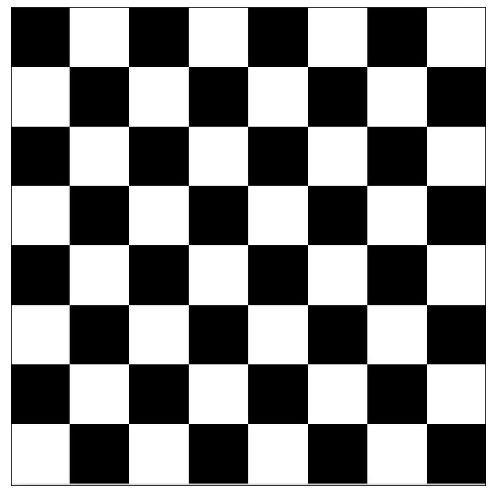

In [3]:
img_original = cv.imread(path.join(curdir,"chessboard.jpg"))
gray = cv.cvtColor(img_original,cv.COLOR_BGR2GRAY)
plt.style.use("seaborn-poster")
plt.xticks([]),plt.yticks([])
plt.imshow(gray,cmap="gray")

### bluring the image   
---

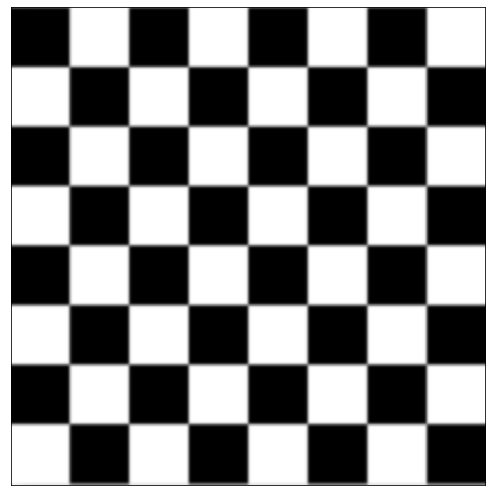

In [4]:
blured = cv.GaussianBlur(gray, (15, 15), 0)
plt.xticks([]),plt.yticks([])
plt.imshow(blured,cmap="gray")

### Applying Canny Edge Detection   
---

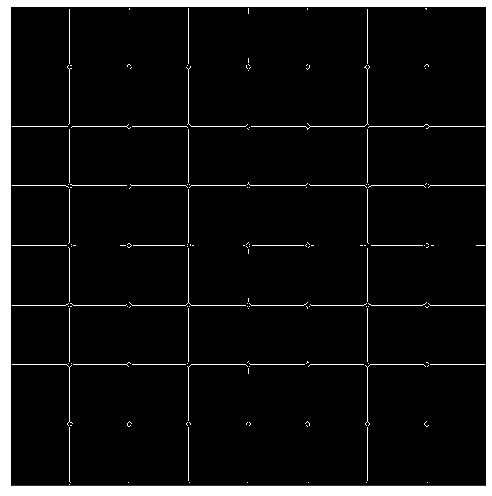

In [5]:
edged = cv.Canny(blured, 50, 100) # converting the image into
plt.xticks([]),plt.yticks([])
plt.imshow(edged,cmap="gray")

### Dilating the image  
---
as you can see the edges are not connected properly. by applying dilate openCv will connect all the edges.  
will run this for 2 iterations

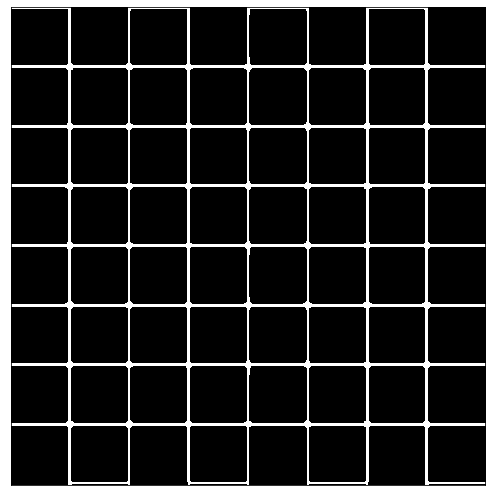

In [6]:
dilated = cv.dilate(edged, None, iterations=2)
plt.xticks([]),plt.yticks([])
plt.imshow(dilated,cmap="gray")

### finding the corner points in the image  
---

In [7]:
corners = cv.goodFeaturesToTrack(dilated,300,0.5,100)
corners = np.int16(corners)

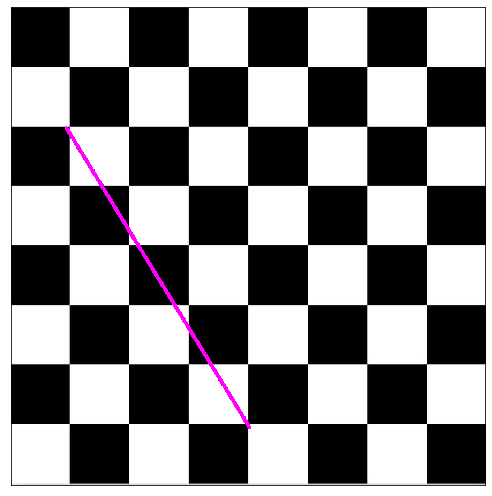

In [8]:
final = cv.line(img_original,tuple(corners[0].ravel()),tuple(corners[1].ravel()),(255,0,255),5)
plt.xticks([]),plt.yticks([])
plt.imshow(final)

In [9]:
distance = dist.euclidean(tuple(corners[0].ravel()), tuple(corners[1].ravel()))
distance

655.3205322588328

In [10]:
print(tuple(corners[0].ravel()))
print(tuple(corners[1].ravel()))

(445, 786)
(103, 227)
